# My Linear Regression vs Sk-learn Linear Regression with Random Data

In this notebook I will test the linear regression algorithm I made from scratch vs the Sk-learn Linear Regression, the notebook has the following sections:
1. Create the Random Data
2. Create my LR Model
3. Creathe the Sk-learn LR model
5. Compare the results

In [76]:
# My Linear Regression Model
from linear_regression import myLinearRegression
# Utilities from Sk-learn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
# Numpy for math computations
import numpy as np
np.set_printoptions(precision=5)
# Print like tabular data
from tabulate import tabulate
# Plot the data
import matplotlib.pyplot as plt

## 1. Create the Random Data
- **X**: a matrix of 100 instances of 5 features
- **weigths**: the "real" weights that represents the linear relationship between **X** and **y**
- **y**: a vector of 100 elements 

In [77]:
np.random.seed(42)
X = np.random.randn(100, 5)
weights = np.random.rand(5)

intercept = np.random.randn()
noise = np.random.randn(100) * 0.1  # Noise with std of 0.1
y = np.dot(X, weights) + intercept + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

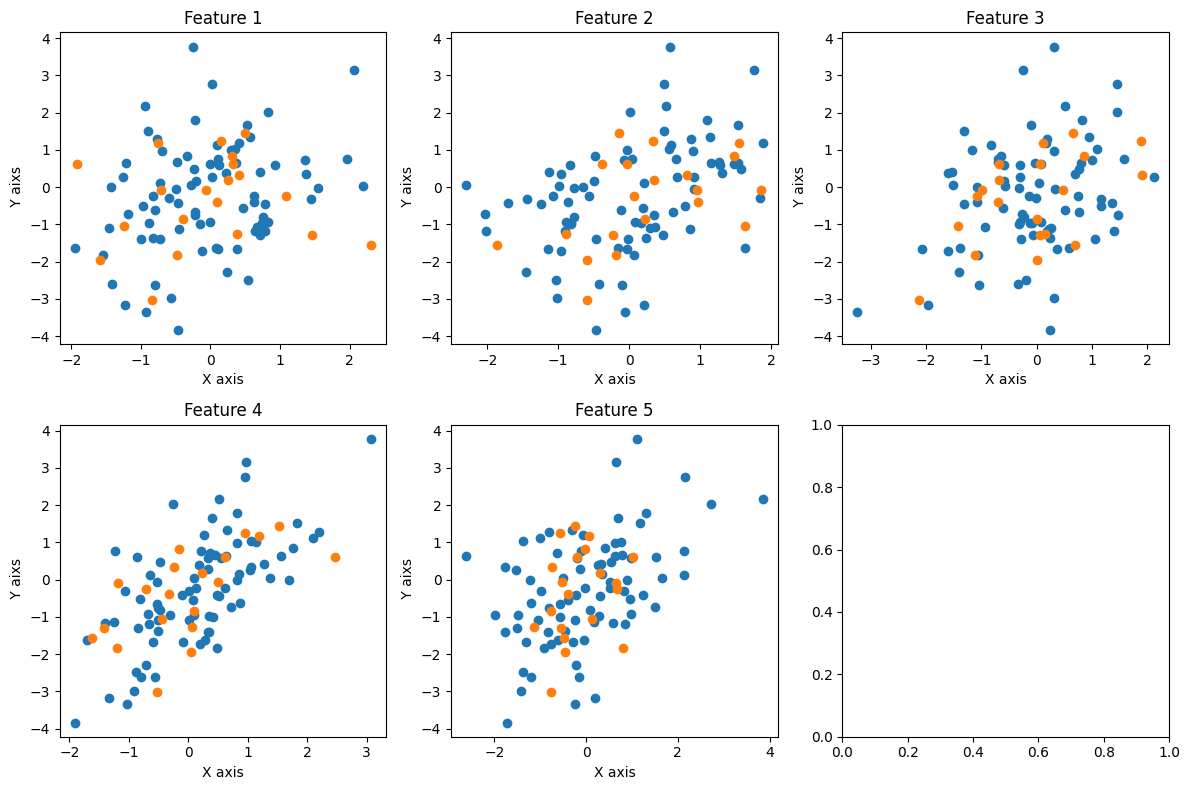

In [78]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs = axs.ravel()

# Create 5 plots, one for each feature in X
for i in range(5):
    axs[i].scatter(X_train[:, i], y_train)
    axs[i].scatter(X_test[:, i], y_test)
    axs[i].set_title(f'Feature {i+1}')
    axs[i].set_xlabel('X axis')
    axs[i].set_ylabel(' Y aixs')

plt.tight_layout()
plt.show()

## 2. Create my LR model and fit it

In [79]:
model = myLinearRegression()
model.fit(X_train, y_train)

Converged at epoch 396


In [80]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [81]:
weights_table = {
    'Weight': [f'w{i+1}' for i in range(len(weights))],
    'Real weights': weights, 
    'Learned Weights': model.weights,
    'Absolute difference': np.abs(weights - model.weights.reshape(-1))
    }

print(tabulate(
    weights_table, 
    headers=['Weight', 'Real weights', 'Learned Weights', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭──────────┬────────────────┬───────────────────┬───────────────────────╮
│ Weight   │   Real weights │   Learned Weights │   Absolute Difference │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w1       │       0.645917 │          0.641014 │            0.00490287 │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w2       │       0.570778 │          0.559563 │            0.0112155  │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w3       │       0.356097 │          0.362336 │            0.0062392  │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w4       │       0.986515 │          0.995818 │            0.00930273 │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w5       │       0.605775 │          0.594325 │            0.0114497  │
╰──────────┴────────────────┴───────────────────┴───────────────────────╯


In [82]:
print(f'The bias is: {model.bias:.4f}')
print(f'The Mse is {mse:.4f}')

The bias is: -0.3661
The Mse is 0.0097


###  Create the Sk-learn LR model 

In [83]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
y_pred = sklearn_model.predict(X_test)
sk_mse = mean_squared_error(y_test, y_pred)

## Compare both models

In [84]:
weights_table = {
    'Weight': [f'w{i+1}' for i in range(len(weights))],
    'myModel weights': weights, 
    'Sk-learn weights': sklearn_model.coef_,
    'Absolute difference': np.abs(weights - sklearn_model.coef_)
    }

print(tabulate(
    weights_table, 
    headers=['Weight', 'myModel weights', 'Sk-learn Weights', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭──────────┬───────────────────┬────────────────────┬───────────────────────╮
│ Weight   │   myModel weights │   Sk-learn Weights │   Absolute Difference │
├──────────┼───────────────────┼────────────────────┼───────────────────────┤
│ w1       │          0.645917 │           0.646581 │           0.000663644 │
├──────────┼───────────────────┼────────────────────┼───────────────────────┤
│ w2       │          0.570778 │           0.561855 │           0.0089234   │
├──────────┼───────────────────┼────────────────────┼───────────────────────┤
│ w3       │          0.356097 │           0.360612 │           0.0045149   │
├──────────┼───────────────────┼────────────────────┼───────────────────────┤
│ w4       │          0.986515 │           0.997626 │           0.0111105   │
├──────────┼───────────────────┼────────────────────┼───────────────────────┤
│ w5       │          0.605775 │           0.595627 │           0.0101474   │
╰──────────┴───────────────────┴────────────────────┴───────────

In [85]:
print(tabulate(
    [[model.bias, sklearn_model.intercept_, abs(model.bias - sklearn_model.intercept_)]], 
    headers=['myModel bias', 'Sk-learn bias', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭────────────────┬─────────────────┬───────────────────────╮
│   myModel bias │   Sk-learn bias │   Absolute Difference │
├────────────────┼─────────────────┼───────────────────────┤
│      -0.366113 │       -0.367621 │            0.00150773 │
╰────────────────┴─────────────────┴───────────────────────╯


In [86]:
print(tabulate(
    [[mse, sk_mse, abs(mse - sk_mse)]], 
    headers=['myModel MSE', 'Sk-learn MSE', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭───────────────┬────────────────┬───────────────────────╮
│   myModel MSE │   Sk-learn MSE │   Absolute Difference │
├───────────────┼────────────────┼───────────────────────┤
│    0.00970265 │     0.00964609 │            5.6559e-05 │
╰───────────────┴────────────────┴───────────────────────╯


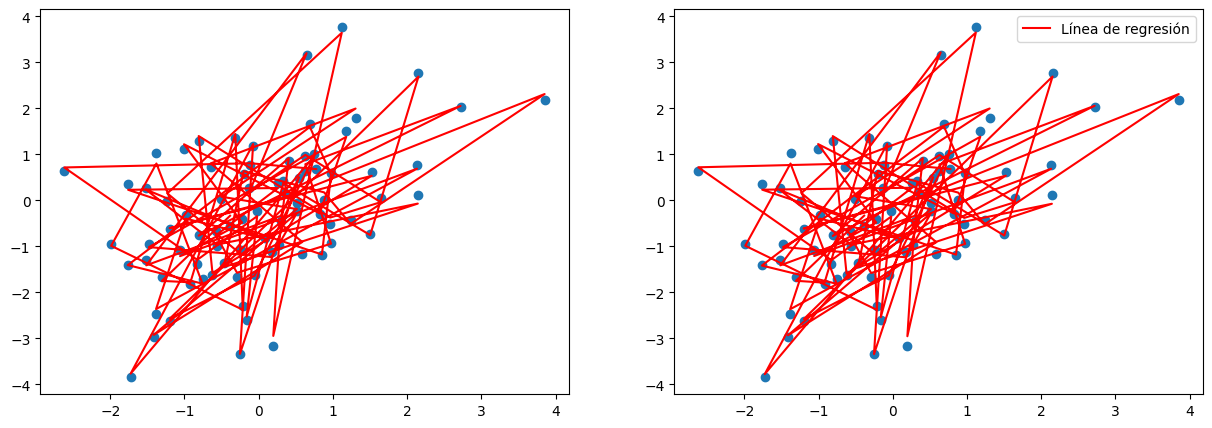

In [88]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
models = [model, sklearn_model]

for i in range(2):
    axs[i].scatter(X_train[:, 4], y_train)
    axs[i].plot(X_train[:, 4], models[i].predict(X_train), color='red', label="Línea de regresión")
    
plt.legend()
plt.show()